In [23]:
import sys, pathlib

ROOT = pathlib.Path.cwd().resolve().parents[0]
if str(ROOT) not in sys.path:
    sys.path.insert(0, str(ROOT))

In [29]:
%load_ext memory_profiler

import numpy as np
import psutil, os, time, datetime
import matplotlib.pyplot as plt
import torch

import importlib
from experiments._utils import mem_funcs
importlib.reload(mem_funcs);

The memory_profiler extension is already loaded. To reload it, use:
  %reload_ext memory_profiler


In [ ]:
# def allocate_arrays(power_max: int = 12, backend: str = "numpy"):
#     """
#     Allocate arrays of size 2**k elements (float32) for k = 0..power_max.
#     Returns the list so Python keeps them alive (forces the RAM hit).
#     """
#     arrs = []
#     for k in range(power_max + 1):
#         n = 2 ** k
#         if backend == "numpy":
#             arrs.append(np.empty(n, dtype=np.float32))
#         elif backend == "torch":
#             arrs.append(torch.empty(n, dtype=torch.float32, device="cpu"))
#         else:
#             raise ValueError("backend must be 'numpy' or 'torch'")
#     return arrs


In [ ]:
from memory_profiler import memory_usage

def sample_and_plot(power_max=12, backend="numpy", touch=True):
    # sample RAM every 0.1 s while allocate_arrays runs
    mem_trace = memory_usage(
    (mem_funcs.allocate_arrays, (), dict(power_max=12, backend="numpy", touch=True)),
    interval=0.1, retval=True, include_children=True
)
    # build x-axis in seconds
    dt = 0.1
    x = [i * dt for i in range(len(mem_trace))]

    # plot
    plt.figure(figsize=(6, 3))
    plt.plot(x, mem_trace)
    plt.xlabel("seconds")
    plt.ylabel("Resident RAM (MiB)")
    plt.title(f"RAM footprint while allocating 2**k arrays ({backend})")
    plt.tight_layout()
    plt.show()

sample_and_plot(power_max=12, backend="numpy", touch=True)


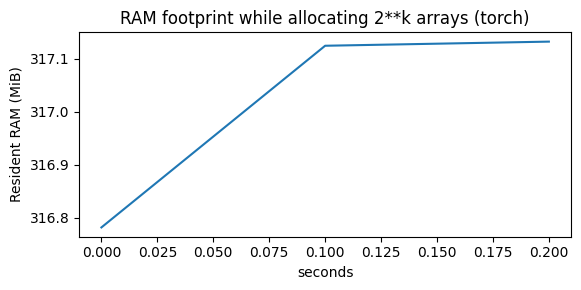

In [5]:
sample_and_plot(power_max=12, backend="torch")


In [35]:
%mprun -f mem_funcs.allocate_arrays mem_funcs.allocate_arrays(power_max=12, backend="numpy")

Filename: C:\Users\simbarashe.timire\Documents\Projects\lab\experiments\_utils\mem_funcs.py

Line #    Mem usage    Increment  Occurrences   Line Contents
     4    262.1 MiB    262.1 MiB           1   def allocate_arrays(power_max: int = 12, backend: str = "numpy"):
     5                                             """
     6                                             Allocate arrays of size 2**k elements (float32) for k = 0..power_max.
     7                                             Keeps them in a list so they stay resident in RAM.
     8                                             """
     9    262.1 MiB      0.0 MiB           1       arrs = []
    10    262.1 MiB      0.0 MiB          14       for k in range(power_max + 1):
    11    262.1 MiB      0.0 MiB          13           n = 2 ** k
    12    262.1 MiB      0.0 MiB          13           if backend == "numpy":
    13    262.1 MiB      0.0 MiB          13               arrs.append(np.empty(n, dtype=np.float32))
    14    

In [34]:
%mprun -f mem_funcs.allocate_arrays mem_funcs.allocate_arrays(power_max=12, backend="torch")


Filename: C:\Users\simbarashe.timire\Documents\Projects\lab\experiments\_utils\mem_funcs.py

Line #    Mem usage    Increment  Occurrences   Line Contents
     4    262.1 MiB    262.1 MiB           1   def allocate_arrays(power_max: int = 12, backend: str = "numpy"):
     5                                             """
     6                                             Allocate arrays of size 2**k elements (float32) for k = 0..power_max.
     7                                             Keeps them in a list so they stay resident in RAM.
     8                                             """
     9    262.1 MiB      0.0 MiB           1       arrs = []
    10    262.1 MiB      0.0 MiB          14       for k in range(power_max + 1):
    11    262.1 MiB      0.0 MiB          13           n = 2 ** k
    12    262.1 MiB      0.0 MiB          13           if backend == "numpy":
    13                                                     arrs.append(np.empty(n, dtype=np.float32))
    14    